In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/delivery_time.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

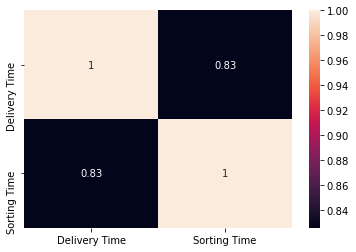

In [6]:
corr=df.corr()
sns.heatmap(corr, annot=True)

In [7]:
df1=df.rename({'Delivery Time':'DT' , 'Sorting Time':'ST'}, axis=1)

In [8]:
df1.columns

Index(['DT', 'ST'], dtype='object')

C:\Users\Ruchita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

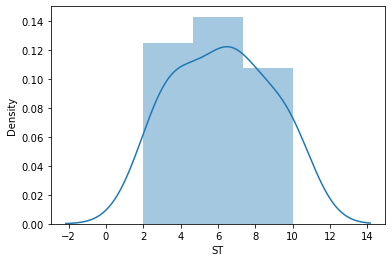

In [9]:
sns.distplot(df1['ST'])

<AxesSubplot:xlabel='DT', ylabel='ST'>

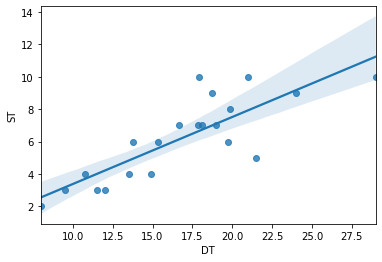

In [10]:
sns.regplot(x="DT", y="ST", data=df1)

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("ST~DT", data=df1).fit()

In [12]:
model.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [13]:
print(model.tvalues)

Intercept   -0.667290
DT           6.387447
dtype: float64


In [14]:
(model.rsquared , model.rsquared_adj)

(0.6822714748417232, 0.6655489208860245)

In [15]:
newdf=pd.Series([345,678])
data_pred=pd.DataFrame(newdf, columns=['DT'])
data_pred

,DT
0,345
1,678


In [16]:
model.predict(data_pred)

0    141.984878
1    279.761506
dtype: float64